# Obesidad en USA y a que esta relacionada

esta conformado de varios DataSet tanto de kagle como de paginas guvernamentales.

En este EDA se abarcara:
-  Ambito social (más a la hora de presentar)
-  Ambito economico
-  Ambito de habitos

In [2]:
import pandas as pd
import numpy as np
import os

In [2]:
os.getcwd()

## Limpieza de data 
- cargar archivos 
- mirar la informacion
- corregir cualquier dato erroneo o faltante

### Obesidad por estados y caracteristicas de cada uno

In [11]:
#1CSV de obesidad por estados area y cantidad de personas.
df_USA=pd.read_csv('Data/National_Obesity_By_State.csv')
df_USA.rename(columns = {'NAME':'State'}, inplace = True)



In [12]:
#2CSV de Obesidad cocn datos extras como poblacion de cada estado
df_GDP_Ob=pd.read_csv('Data/Obesity_GDP_PanelData.csv')
df_GDP_Ob.head()
#usar datos del 2017
df1=df_GDP_Ob[df_GDP_Ob['Year'] == 2017]
df1


,State,Year,Adult.Obesity,Adult.Obesity*100,Average.Age,Average.Income,Population,Poverty.Rate,Poverty.Rate*100,Real.GDP,Real.GDP.Growth,Real.GDP.Growth*100,Real.Personal.Income,Region,Region.Encoding,Unit,Real.GDP.Per.Capita,YearFE
3,Alabama,2017,0.340,34.0,39.176384,26471.72046,4874747,0.168889,16.89,193053.0,0.0181,1.81,215669.8,Southeast Region,5,Millions of chained 2012 dollars,0.039603,2017
7,Alaska,2017,0.287,28.7,35.591403,34438.53759,739795,0.111055,11.11,52492.0,-0.0022,-0.22,38119.9,Far West Region,8,Millions of chained 2012 dollars,0.070955,2017
11,Arizona,2017,0.261,26.1,38.689514,29420.61094,7016270,0.148618,14.86,297209.8,0.0295,2.95,294575.6,Southwest Region,6,Millions of chained 2012 dollars,0.042360,2017
15,Arkansas,2017,0.344,34.4,38.647587,25272.81432,3004279,0.164030,16.40,114851.2,0.0094,0.94,136629.5,Southeast Region,5,Millions of chained 2012 dollars,0.038229,2017
19,California,2017,0.227,22.7,37.651117,35128.22756,39536653,0.133019,13.30,2587571.6,0.0355,3.55,1955659.6,Far West Region,8,Millions of chained 2012 dollars,0.065447,2017
23,Colorado,2017,0.202,20.2,37.788892,36491.06897,5607154,0.102918,10.29,325129.4,0.0308,3.08,285343.0,Rocky Mountain Region,7,Millions of chained 2012 dollars,0.057985,2017
27,Connecticut,2017,0.251,25.1,40.383524,41961.13526,3588184,0.095943,9.59,239884.0,-0.0065,-0.65,226462.2,New England Region,1,Millions of chained 2012 dollars,0.066854,2017
31,Delaware,2017,0.294,29.4,40.292749,34849.82608,961939,0.135822,13.58,63651.0,-0.0011,-0.11,45604.3,Mideast Region,2,Millions of chained 2012 dollars,0.066169,2017
35,Florida,2017,0.257,25.7,41.521161,29834.12689,20984400,0.140472,14.05,885905.7,0.0253,2.53,952254.7,Southeast Region,5,Millions of chained 2012 dollars,0.042217,2017
39,Georgia,2017,0.296,29.6,37.253689,29607.16698,10429379,0.149457,14.95,509422.2,0.0287,2.87,475057.9,Southeast Region,5,Millions of chained 2012 dollars,0.048845,2017


In [13]:
#combinacion de CSV 1 y CSV 2 ordenado por stados con mayor obesidad
df_Usa_GDP_Ob=pd.merge(df_USA, df1)
clean_Usa_GDP_OB=df_Usa_GDP_Ob.drop(['Obesity','FID','Adult.Obesity','Poverty.Rate','Real.GDP.Growth','YearFE','SHAPE_Length','Region.Encoding','Population','Region','Real.GDP.Growth*100'], axis=1)
clean_Usa_GDP_OB.columns

Index(['State', 'SHAPE_Area', 'Year', 'Adult.Obesity*100', 'Average.Age',
       'Average.Income', 'Poverty.Rate*100', 'Real.GDP',
       'Real.Personal.Income', 'Unit', 'Real.GDP.Per.Capita'],
      dtype='object')

In [14]:
# 3 CSV restaurantes por cada 100k personas
Res_estado=pd.read_csv('Data/Cantidad_Res.csv')
Res_estado.rename(columns = {'All Fast Food RES':'All-Fast-Food-RES per-100k'}, inplace = True)
Res_estado.replace({'State': {'Idaho\t': 'Idaho', 'Maine\t': 'Maine'}},inplace=True)

In [15]:
# 4 CSV Poblacion por estados
Pob_estado=pd.read_csv('Data/NST-EST2022-ALLDATA.csv')
Pob_estado.drop(['SUMLEV', 'REGION', 'DIVISION', 'STATE','POPESTIMATE2021','POPESTIMATE2020', 'POPESTIMATE2022', 'NPOPCHG_2020',
       'NPOPCHG_2021', 'NPOPCHG_2022', 'BIRTHS2020', 'BIRTHS2021',
       'BIRTHS2022', 'DEATHS2020', 'DEATHS2021', 'DEATHS2022',
       'NATURALCHG2020', 'NATURALCHG2021', 'NATURALCHG2022',
       'INTERNATIONALMIG2020', 'INTERNATIONALMIG2021', 'INTERNATIONALMIG2022',
       'DOMESTICMIG2020', 'DOMESTICMIG2021', 'DOMESTICMIG2022', 'NETMIG2020',
       'NETMIG2021', 'NETMIG2022', 'RESIDUAL2020', 'RESIDUAL2021',
       'RESIDUAL2022', 'RBIRTH2021', 'RBIRTH2022', 'RDEATH2021', 'RDEATH2022',
       'RNATURALCHG2021', 'RNATURALCHG2022', 'RINTERNATIONALMIG2021',
       'RINTERNATIONALMIG2022', 'RDOMESTICMIG2021', 'RDOMESTICMIG2022',
       'RNETMIG2021', 'RNETMIG2022'], axis=1,inplace=True)
Pob_estado.rename(columns = {'NAME':'State'}, inplace = True)
Pob_estado.rename(columns = {'ESTIMATESBASE2020':'Population'}, inplace = True)


In [16]:
# Union de CSV 3 y CSV 4
pob_res_estado=pd.merge(Pob_estado, Res_estado)


In [17]:
#adicion de columna
pob_res_estado['All fast food']=round(pob_res_estado['Population']*pob_res_estado['All-Fast-Food-RES per-100k']/100000) 


In [74]:
#Data limpia y completa
Data_1=pd.merge(clean_Usa_GDP_OB, pob_res_estado)
Data_1.sort_values(['Adult.Obesity*100'],ascending=False)
Data_1

,State,SHAPE_Area,Year,Adult.Obesity*100,Average.Age,Average.Income,Poverty.Rate*100,Real.GDP,Real.Personal.Income,Unit,Real.GDP.Per.Capita,Population,All-Fast-Food-RES per-100k,Full-service Res,All fast food
0,Texas,7.672329e+12,2017,28.0,35.842658,29546.10192,14.73,1624948.8,1325668.8,Millions of chained 2012 dollars,0.057409,29145428,75.8,63.8,22092.0
1,California,5.327809e+12,2017,22.7,37.651117,35128.22756,13.30,2587571.6,1955659.6,Millions of chained 2012 dollars,0.065447,39538245,82.3,80.4,32540.0
2,Kentucky,1.128830e+12,2017,32.9,38.866208,26627.37441,17.24,183566.0,196801.6,Millions of chained 2012 dollars,0.041212,4505893,74.2,63.2,3343.0
3,Georgia,1.652980e+12,2017,29.6,37.253689,29607.16698,14.95,509422.2,475057.9,Millions of chained 2012 dollars,0.048845,10711937,82.5,69.4,8837.0
4,Wisconsin,1.567816e+12,2017,30.4,39.592134,32003.04263,11.33,292477.2,292707.6,Millions of chained 2012 dollars,0.050466,5893725,65.0,86.4,3831.0
5,Oregon,3.178446e+12,2017,26.4,39.701947,31918.45573,13.24,206710.9,191045.1,Millions of chained 2012 dollars,0.049897,4237291,73.4,104.1,3110.0
6,Virginia,1.158804e+12,2017,27.2,38.606433,37485.33127,10.64,463426.1,434480.0,Millions of chained 2012 dollars,0.054714,8631384,80.1,81.7,6914.0
7,Tennessee,1.177054e+12,2017,31.8,38.915088,28655.88187,14.95,313572.6,315891.1,Millions of chained 2012 dollars,0.046690,6910786,77.8,68.2,5377.0
8,Louisiana,1.355094e+12,2017,34.5,37.885754,26010.45294,19.75,228678.1,215828.2,Millions of chained 2012 dollars,0.048818,4657749,76.2,65.0,3549.0
9,New York,1.411441e+12,2017,24.6,39.347850,37157.92734,14.08,1407216.7,1052014.9,Millions of chained 2012 dollars,0.070895,20201230,92.3,106.1,18646.0


### Obesidad relacionada con ganancias brutas y edad

In [7]:
# 5 CSV de obesidad con diversos dadtos de adultos USA

df_adults_Ob=pd.read_csv('Data/percent_of_adults_with_obesity_usafacts.csv')
df_adults_Ob.drop_duplicates('Years', keep="last",inplace=True)
df_adults_Ob

#Hay datos tanto de obesidad por edad, por etnicidad, por ganancia bruta anual y por sexo.
#usar datos 2017
#revisar estados con obesidad

,Years,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Percent of adults with obesity (%),0.158,0.168,0.166,0.183,0.198,0.201,0.211,0.222,0.228,...,0.278000,0.276000,0.294000,0.296000,0.298000,0.299000,0.313000,0.309000,0.32100,0.319000
1,By age group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18 - 24 (%),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.156449,0.158255,0.159340,0.163078,0.173857,0.174882,0.174706,0.184941,0.19874,0.195196
3,25 - 34 (%),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.261784,0.261725,0.271686,0.279784,0.272667,0.276667,0.292980,0.301373,0.30440,0.311608
4,35 - 44 (%),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.307529,0.315275,0.323471,0.331255,0.329098,0.337843,0.338020,0.350863,0.35350,0.360588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Wisconsin (%),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.277000,0.297000,0.298000,0.312000,0.307000,0.307000,0.320000,0.320000,0.34200,0.323000
185,Wyoming (%),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.250000,0.246000,0.278000,0.295000,0.290000,0.277000,0.288000,0.290000,0.29700,0.307000
186,Sources:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,NaN,Centers for Disease Control and Prevention,Behavioral Risk Factor Surveillance System,NaN,https://www.cdc.gov/brfss/brfssprevalence/,NaN,2020,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# porcentaje de obesidad segun ganancia anual 2017
Df1_adult_ob=df_adults_Ob.set_index('Years')
obesidad_ganancia_anual=Df1_adult_ob.iloc[17:22,16:]
obesidad_ganancia_anual=obesidad_ganancia_anual.reset_index()
obesidad_ganancia_anual

,Years,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,"Less than $15,000 (%)",0.323569,0.327235,0.331451,0.349373,0.350843,0.347961,0.365078,0.362588,0.37206,0.368000
1,"$15,000 - $24,999 (%)",0.309667,0.311216,0.322843,0.324961,0.332804,0.334627,0.344451,0.352412,0.35950,0.356647
2,"$25,000 - $34,999 (%)",0.295275,0.290922,0.301686,0.307529,0.320667,0.321784,0.328980,0.332588,0.34252,0.349294
3,"$35,000 - $49,999 (%)",0.289373,0.291294,0.299765,0.311922,0.309157,0.319706,0.328294,0.328314,0.33872,0.347020
4,"$50,000 and above (%)",0.255078,0.261039,0.265667,0.272137,0.273569,0.279451,0.286137,0.300353,0.30698,0.310176


In [10]:
#porcentaje de obesidad segun la edad en 2017
obesidad_edad=Df1_adult_ob.iloc[3:8,16:]
obesidad_edad=obesidad_edad.reset_index()
obesidad_edad
#explicar que se mantienen las 

,Years,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,25 - 34 (%),0.261784,0.261725,0.271686,0.279784,0.272667,0.276667,0.292980,0.301373,0.30440,0.311608
1,35 - 44 (%),0.307529,0.315275,0.323471,0.331255,0.329098,0.337843,0.338020,0.350863,0.35350,0.360588
2,45 - 54 (%),0.325471,0.325824,0.338137,0.340157,0.344314,0.354098,0.365098,0.377686,0.38096,0.384961
3,55 - 64 (%),0.329098,0.331020,0.333941,0.339745,0.337471,0.341412,0.352706,0.354294,0.36706,0.362255
4,65 or older (%),0.250922,0.258373,0.266451,0.274216,0.279627,0.281510,0.288902,0.289235,0.29934,0.294961


### Valores Nutricionales del menu de comidas rapidas

In [ ]:
# class Data:
#     '''
#     Clase para gestionar data

#     Attributes:
#         tipo(str) : Tipología de tienda
#         abierto(bool) : Estado de apertura
#     '''
#     tipo = "Electrodomésticos"
#     abierto = True

#     def __init__(self, nombre:str, dir:str, n_emp:int, ventas_3m:list):
#         '''
#         Atributos particulares de una tienda

#         Args:
#             nombre(str) : Nombre de la tienda
#             dir(str) : Dirección de la tienda
#             n_emp(int) : Nº de empleados de tienda
#             ventas_3m(list) : Ventas de los últimos 3 meses
#         '''
#         self.nombre = nombre
#         self.dir = dir
#         self.n_emp = n_emp
#         self.ventas_3m = ventas_3m

#     def ventas_totales(self):
#         '''
#         Calcula las ventas totales

#         Returns:
#             float
#         '''
#         return sum(self.ventas_3m)

#     def ventas_media(self):
#         '''
#         Calcula las ventas por empleado

#         Returns:
#             float
#         '''
#         return self.ventas_totales()/self.n_emp

#     def datos_tienda(self):
#         '''
#         Devuelve el nombre y dirección de la tienda

#         Returns:
#             str
#         '''
#         return self.nombre + ' ' + self.dir
    
#     def ventas_ult(self):
#         '''
#         Devuelve las ventas del último mes

#         Returns:
#             float
#         '''
#         return float(self.ventas_3m[-1])

#     def inv_mark(self, x:float):
#         '''
#         Calcula las ventas estimadas en función a la inversión de marketing

#         Args:
#             x(float) : Inversión de marketing
# if azucar_razonable=df_nutri[df_nutri['Sugar (g)']<=31.5] 
# else mucha_azucar=df_nutri[df_nutri['Sugar (g)']>=31.5] 
#         Returns:
#             list
#         '''
#         if x < 1000:
#             self.ventas_3m = [x * 1.2 for x in self.ventas_3m] # List comprehension para calcular...
#         else:
#             self.ventas_3m = [x * 1.5 for x in self.ventas_3m]
#         return self.ventas_3m

In [29]:
df_nutri=pd.read_csv('Data/nutrition_values.csv',sep=';')
df_nutri.fillna(value=0, inplace=True)
df_nutri.replace({'-':int(0), ',':'.'}, inplace=True,regex=True)
df_nutri=pd.concat([df_nutri.iloc[:,0:3],df_nutri.iloc[:,3:15].astype(float)],axis=1)
df_nutri

,Chain,Item,Type,Serving Size (g),Calories,Calories from fat,Total Fat (g),Saturated Fat (g),Trans Fat (g),Chol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Total Sugar (g),Protein (g)
0,Burger King,Whopper Sandwich,Whopper Sandwiches,270.0,660.0,360.0,40.0,12.0,1.5,90.0,980.0,49.0,2.0,11.0,28.0
1,Burger King,Whopper Sandwich with Cheese,Whopper Sandwiches,292.0,740.0,420.0,46.0,16.0,2.0,115.0,1340.0,50.0,2.0,11.0,32.0
2,Burger King,Bacon & Cheese Whopper Sandwich,Whopper Sandwiches,303.0,790.0,460.0,51.0,17.0,2.0,125.0,1560.0,50.0,2.0,11.0,35.0
3,Burger King,Double Whopper Sandwich,Whopper Sandwiches,354.0,900.0,520.0,58.0,20.0,3.0,175.0,1050.0,49.0,2.0,11.0,48.0
4,Burger King,Double Whopper Sandwich with Cheese,Whopper Sandwiches,377.0,980.0,580.0,64.0,24.0,3.0,195.0,1410.0,50.0,2.0,11.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,Mc Donalds,Strawberry Banana Smoothie (Medium),McCafe Smoothies,0.0,260.0,5.0,1.0,0.0,0.0,5.0,40.0,60.0,3.0,54.0,2.0
495,Mc Donalds,Strawberry Banana Smoothie (Small),McCafe Smoothies,0.0,210.0,5.0,0.5,0.0,0.0,5.0,35.0,49.0,2.0,44.0,2.0
496,Mc Donalds,Wild Berry Smoothie (Large),McCafe Smoothies,0.0,320.0,10.0,1.0,0.5,0.0,5.0,45.0,75.0,4.0,69.0,3.0
497,Mc Donalds,Wild Berry Smoothie (Medium),McCafe Smoothies,0.0,260.0,5.0,1.0,0.0,0.0,5.0,35.0,60.0,4.0,55.0,3.0


In [42]:
df_nutri=pd.read_csv('Data/nutrition_values.csv',sep=';')
def limpieza(df_nutri):
    df_nutri.fillna(value=0, inplace=True)
    df_nutri.replace({'-':int(0), ',':'.'}, inplace=True,regex=True)
    df_nutri=pd.concat([df_nutri.iloc[:,0:3],df_nutri.iloc[:,3:15].astype(float)],axis=1)
    return df_nutri

In [36]:
limpieza(df_nutri)

,Chain,Item,Type,Serving Size (g),Calories,Calories from fat,Total Fat (g),Saturated Fat (g),Trans Fat (g),Chol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Total Sugar (g),Protein (g)
0,Burger King,Whopper Sandwich,Whopper Sandwiches,270.0,660.0,360.0,40.0,12.0,1.5,90.0,980.0,49.0,2.0,11.0,28.0
1,Burger King,Whopper Sandwich with Cheese,Whopper Sandwiches,292.0,740.0,420.0,46.0,16.0,2.0,115.0,1340.0,50.0,2.0,11.0,32.0
2,Burger King,Bacon & Cheese Whopper Sandwich,Whopper Sandwiches,303.0,790.0,460.0,51.0,17.0,2.0,125.0,1560.0,50.0,2.0,11.0,35.0
3,Burger King,Double Whopper Sandwich,Whopper Sandwiches,354.0,900.0,520.0,58.0,20.0,3.0,175.0,1050.0,49.0,2.0,11.0,48.0
4,Burger King,Double Whopper Sandwich with Cheese,Whopper Sandwiches,377.0,980.0,580.0,64.0,24.0,3.0,195.0,1410.0,50.0,2.0,11.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,Mc Donalds,Strawberry Banana Smoothie (Medium),McCafe Smoothies,0.0,260.0,5.0,1.0,0.0,0.0,5.0,40.0,60.0,3.0,54.0,2.0
495,Mc Donalds,Strawberry Banana Smoothie (Small),McCafe Smoothies,0.0,210.0,5.0,0.5,0.0,0.0,5.0,35.0,49.0,2.0,44.0,2.0
496,Mc Donalds,Wild Berry Smoothie (Large),McCafe Smoothies,0.0,320.0,10.0,1.0,0.5,0.0,5.0,45.0,75.0,4.0,69.0,3.0
497,Mc Donalds,Wild Berry Smoothie (Medium),McCafe Smoothies,0.0,260.0,5.0,1.0,0.0,0.0,5.0,35.0,60.0,4.0,55.0,3.0


In [8]:
#quiero meter esto en diversas funciones.
sugar_safe=df_nutri[df_nutri['Total Sugar (g)']<=31.5] #317
too_much_sugar=df_nutri[df_nutri['Total Sugar (g)']>=31.5] #182

#sorry, this is only trans fat filter, I named this variable not very clear 
fat_safe=sugar_safe[(sugar_safe['Trans Fat (g)']/sugar_safe['Total Fat (g)'])*sugar_safe['Calories from fat']<=sugar_safe['Calories']*0.01] #199
fat_much=sugar_safe[(sugar_safe['Trans Fat (g)']/sugar_safe['Total Fat (g)'])*sugar_safe['Calories from fat']>=sugar_safe['Calories']*0.01] #43

saturated_fat_safe=fat_safe[(fat_safe['Saturated Fat (g)']/fat_safe['Total Fat (g)'])*fat_safe['Calories from fat']<=fat_safe['Calories']*0.1] #66
saturated_fat_much=fat_safe[(fat_safe['Saturated Fat (g)']/fat_safe['Total Fat (g)'])*fat_safe['Calories from fat']>fat_safe['Calories']*0.1] #133

fiber_good=saturated_fat_safe[(saturated_fat_safe['Dietary Fiber (g)']*1000/saturated_fat_safe['Calories'])>=14] # 9, in most of the cases dietary fiber is not enough 
fiber_not_enough=saturated_fat_safe[(saturated_fat_safe['Dietary Fiber (g)']*1000/saturated_fat_safe['Calories'])<14] #57

totalfat_safe=saturated_fat_safe[saturated_fat_safe['Calories from fat']/saturated_fat_safe['Calories']<=30] # all passed this filter
totalfat_much=saturated_fat_safe[saturated_fat_safe['Calories from fat']/saturated_fat_safe['Calories']>30]

sodium_safe=totalfat_safe[totalfat_safe['Sodium (mg)']<=2300] # they all passed it too 
sodium_much=totalfat_safe[totalfat_safe['Sodium (mg)']>2300]
sodium_safe

,Chain,Item,Type,Serving Size (g),Calories,Calories from fat,Total Fat (g),Saturated Fat (g),Trans Fat (g),Chol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Total Sugar (g),Protein (g),Calories from trans fat / Total Calories,Calories from saturated fat / Total Calories,Dietary fiber/ 1000 calories
22,Burger King,Crispy Chicken Sandwich,Chicken & More,228.0,670.0,370.0,41.0,7.0,0.0,60.0,1080.0,54.0,2.0,8.0,23.0,55.223881,9.428467,2.985075
23,Burger King,Spicy Crispy Chicken Sandwich,Chicken & More,242.0,700.0,370.0,42.0,7.0,0.0,65.0,1140.0,57.0,3.0,8.0,25.0,52.857143,8.809524,4.285714
24,Burger King,Original Chicken Sandwich,Chicken & More,219.0,660.0,360.0,40.0,7.0,0.0,75.0,1170.0,48.0,2.0,5.0,28.0,54.545455,9.545455,3.030303
27,Burger King,Crispy Chicken Jr.,Chicken & More,142.0,450.0,270.0,30.0,5.0,0.0,30.0,780.0,34.0,2.0,5.0,12.0,60.000000,10.000000,4.444444
28,Burger King,Spicy Crispy Chicken Jr.,Chicken & More,142.0,390.0,190.0,21.0,3.5,0.0,30.0,740.0,37.0,2.0,6.0,12.0,48.717949,8.119658,5.128205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,Mc Donalds,Apple Dippers with Low Fat Caramel Dip,Desserts/Shakes,89.0,100.0,5.0,0.5,0.0,0.0,5.0,35.0,23.0,0.0,15.0,0.0,5.000000,0.000000,0.000000
316,Mc Donalds,1% Low Fat Chocolate Milk Jug,Beverages,0.0,170.0,25.0,3.0,1.5,0.0,5.0,150.0,26.0,1.0,25.0,9.0,14.705882,7.352941,5.882353
468,Mc Donalds,Iced Caramel Latte (Small),0,0.0,160.0,25.0,3.0,1.5,0.0,10.0,100.0,29.0,0.0,29.0,3.0,15.625000,7.812500,0.000000
471,Mc Donalds,Iced Hazelnut Latte (Small),0,0.0,160.0,25.0,3.0,1.5,0.0,10.0,45.0,31.0,0.0,31.0,3.0,15.625000,7.812500,0.000000


In [12]:
sugar_safe=df_nutri[df_nutri['Total Sugar (g)']<=31.5] #317
sugar_safe.sort_values('Total Sugar (g)', ascending=False)

,Chain,Item,Type,Serving Size (g),Calories,Calories from fat,Total Fat (g),Saturated Fat (g),Trans Fat (g),Chol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Total Sugar (g),Protein (g),Calories from trans fat / Total Calories,Calories from saturated fat / Total Calories,Dietary fiber/ 1000 calories
91,Burger King,NY Ultimate Platter,Breakfast,400.0,900.0,420.0,46.0,12.0,0.0,380.0,1760.0,95.0,5.0,31.0,25.0,46.666667,12.173913,5.555556
483,Mc Donalds,Caramel Mocha (Small),0,0.0,250.0,90.0,11.0,6.0,0.0,25.0,150.0,33.0,0.0,31.0,7.0,36.000000,19.636364,0.000000
474,Mc Donalds,Iced Vanilla Latte (Small),0,0.0,160.0,25.0,3.0,1.5,0.0,10.0,45.0,31.0,0.0,31.0,3.0,15.625000,7.812500,0.000000
471,Mc Donalds,Iced Hazelnut Latte (Small),0,0.0,160.0,25.0,3.0,1.5,0.0,10.0,45.0,31.0,0.0,31.0,3.0,15.625000,7.812500,0.000000
469,Mc Donalds,Iced Caramel Latte (Medium),0,0.0,180.0,40.0,4.5,2.5,0.0,15.0,120.0,31.0,0.0,31.0,4.0,22.222222,12.345679,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,Mc Donalds,Chicken McNuggets (6pc),Chicken & Sauce,97.0,280.0,160.0,18.0,3.0,0.0,40.0,540.0,18.0,1.0,0.0,13.0,57.142857,9.523810,3.571429
213,Mc Donalds,Chicken McNuggets (4pc),Chicken & Sauce,65.0,190.0,110.0,12.0,2.0,0.0,25.0,360.0,12.0,1.0,0.0,9.0,57.894737,9.649123,5.263158
212,Mc Donalds,Salt Packet,French Fries,0.7,0.0,0.0,0.0,0.0,0.0,0.0,270.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
210,Mc Donalds,Large French Fries,French Fries,154.0,500.0,220.0,25.0,3.5,0.0,0.0,350.0,63.0,6.0,0.0,6.0,44.000000,6.160000,12.000000


In [ ]:
fiber_good=fiber_good[fiber_good['Serving Size (g)']!=0]
fiber_good=fiber_good[fiber_good['Item']!=0]        
fiber_good['Protein (g)/g of portion']=fiber_good['Protein (g)']/fiber_good['Serving Size (g)']


fiber_good.sort_values(by='Protein (g)/g of portion').plot.barh(x='Item',y='Protein (g)/g of portion', figsize=(15,15), stacked=True)

In [44]:
def filtro_de_salud(x='sodium'):
    
    sugar_safe=df_nutri[df_nutri['Total Sugar (g)']<=31.5]     
    fat_safe=sugar_safe[(sugar_safe['Trans Fat (g)']/sugar_safe['Total Fat (g)'])*sugar_safe['Calories from fat']<=sugar_safe['Calories']*0.01]    
    saturated_fat_safe=fat_safe[(fat_safe['Saturated Fat (g)']/fat_safe['Total Fat (g)'])*fat_safe['Calories from fat']<=fat_safe['Calories']*0.1]
    totalfat_safe=saturated_fat_safe[saturated_fat_safe['Calories from fat']/saturated_fat_safe['Calories']<=30] 
    if x is 'sodium':        
        sodium_safe=totalfat_safe[totalfat_safe['Sodium (mg)']<=2300]
        sodium_safe=sodium_safe[sodium_safe['Serving Size (g)']!=0]
        sodium_safe=sodium_safe[sodium_safe['Item']!=0]        
        sodium_safe['Protein (g)/g of portion']=sodium_safe['Protein (g)']/sodium_safe['Serving Size (g)'] 
        return sodium_safe
    elif x is 'fiber':
        fiber_good=saturated_fat_safe[(saturated_fat_safe['Dietary Fiber (g)']*1000/saturated_fat_safe['Calories'])>=14]
        fiber_good=fiber_good[fiber_good['Serving Size (g)']!=0]
        fiber_good=fiber_good[fiber_good['Item']!=0]        
        fiber_good['Protein (g)/g of portion']=fiber_good['Protein (g)']/fiber_good['Serving Size (g)']
        return fiber_good

In [45]:
filtro_de_salud()


TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [46]:
filtro_de_salud('fiber')

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [8]:
pd.set_option('display.max_rows', None)

## Analisis y visualizacion

In [4]:
import folium # pip install folium
from folium import plugins
import geocoder # pip install geocoder
import geopy # pip install geopy
import numpy as np
import pandas as pd
from vega_datasets import data as vds # pip install vega_datasets

In [5]:

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Visualizacion obesidad por estados y restaurantes

In [210]:
Data_state_1=Data_1.set_index('State')


In [221]:
# plt.figure(figsize=(15,15))
# sns.heatmap(Data_state_1.corr(),
#             vmin=-1,
#             vmax=1,
#             cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
#             square=True,
#             linewidths=.1,
#             annot=True);

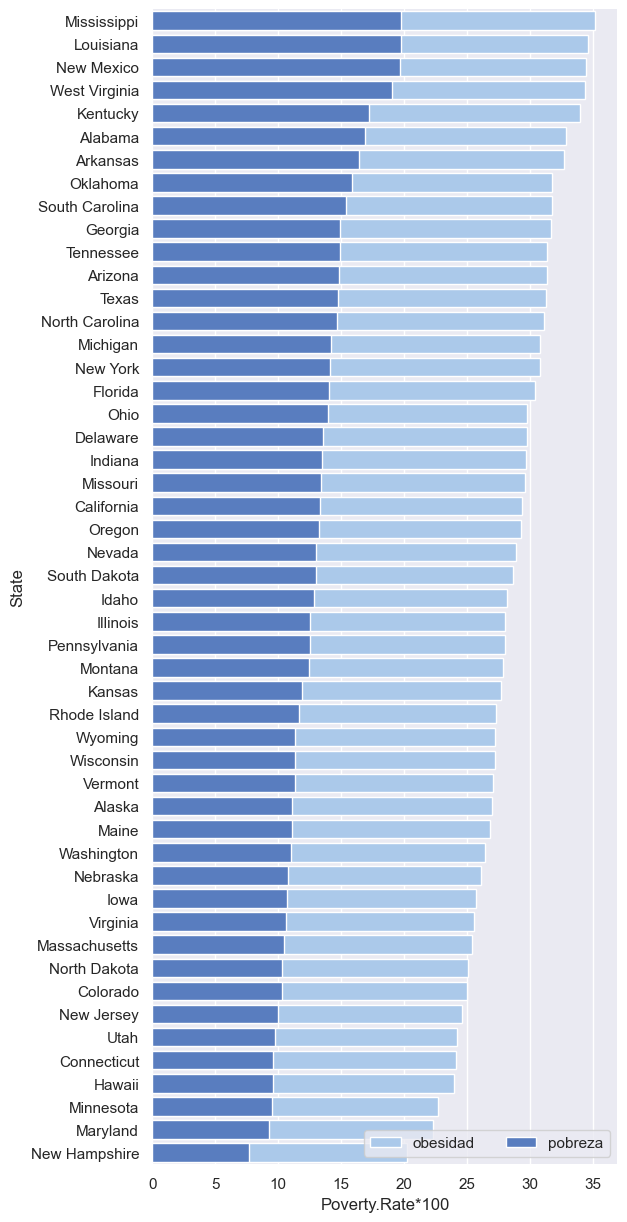

In [209]:
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Adult.Obesity*100", y="State", data=Data_1.sort_values(['Adult.Obesity*100'],ascending=False),
            label="obesidad", color="b")
# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x='Poverty.Rate*100', y="State", data=Data_1.sort_values(['Poverty.Rate*100'],ascending=False),
            label="pobreza", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)


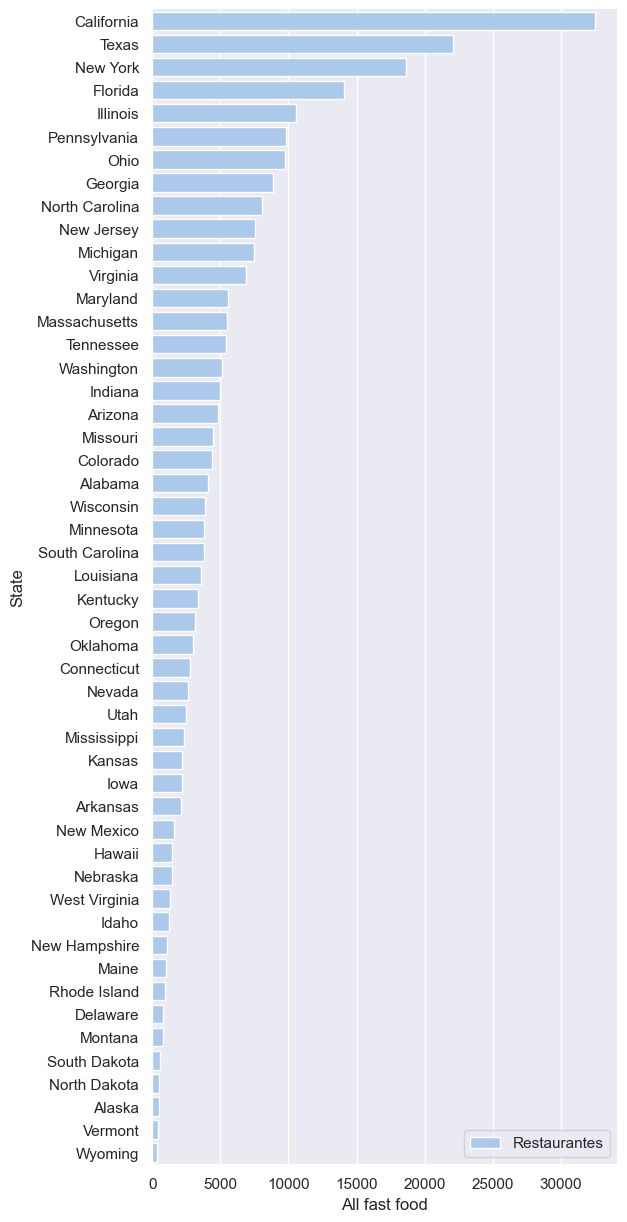

In [222]:
f, ax = plt.subplots(figsize=(6, 15))

sns.set_color_codes("pastel")
sns.barplot(x='All fast food', y="State", data=Data_1.sort_values(['All fast food'],ascending=False),
            label="Restaurantes", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)

In [76]:
Data_1.loc[:,['State','Adult.Obesity*100']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              50 non-null     object 
 1   Adult.Obesity*100  50 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


In [22]:
# State_obe=Data_1
 
# # Initialize the map:
# m = folium.Map(location=[38.788, -101], zoom_start = 3, scrollWheelZoom=False,tiles='CartoDB positron')

# # add tile layers to the map
# # con esto posibilito que luego en el mapa pueda elegir el 'tipo de vista'
# tiles = ['stamenwatercolor','cartodbpositron','openstreetmap','stamenterrain']
# for tile in tiles:
#     folium.TileLayer(tile).add_to(m)
    
 
# # Add the color for the chloropleth:
# m.choropleth(
#  geo_data='Data/us-state-boundaries.json',
#  name='choropleth',
#  data=State_obe,
#  columns=['State', 'All fast food'],
#  fill_color='BuPu',
#  key_on='feature.properties.name' ,
#  fill_opacity=0.7,
#  line_opacity=0.2,
#  legend_name='Indice de obesidad (%)'
# )
# folium.LayerControl().add_to(m)

m

NameError: name 'm' is not defined

In [21]:
# State_obeso=Data_1
 
# # Initialize the map:
# n = folium.Map(location=[38.788, -101], zoom_start = 3, scrollWheelZoom=False,tiles='CartoDB positron')

# # add tile layers to the map
# # con esto posibilito que luego en el mapa pueda elegir el 'tipo de vista'
# tiles = ['stamenwatercolor','cartodbpositron','openstreetmap','stamenterrain']
# for tile in tiles:
#     folium.TileLayer(tile).add_to(n)
    
 
# # Add the color for the chloropleth:
# n.choropleth(
#  geo_data='Data/us-state-boundaries.json',
#  name='choropleth',
#  data=State_obeso,
#  columns=['State', 'Adult.Obesity*100'],
#  fill_color='BuPu',
#  key_on='feature.properties.name' ,
#  fill_opacity=0.7,
#  line_opacity=0.2,
#  legend_name='Indice de obesidad (%)'
# )
# folium.LayerControl().add_to(m)

# n

### Visualizacion de obesidad por edades y ganancia en USA

In [22]:
Obesidad_edad=obesidad_edad.set_index('Years')

In [2]:
# plt.figure(figsize=(15,15))
# sns.heatmap(Obesidad_edad.corr(),
#             vmin=-1,
#             vmax=1,
#             cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
#             square=True,
#             linewidths=.1,
#             annot=True);

ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of ticklabels (5).

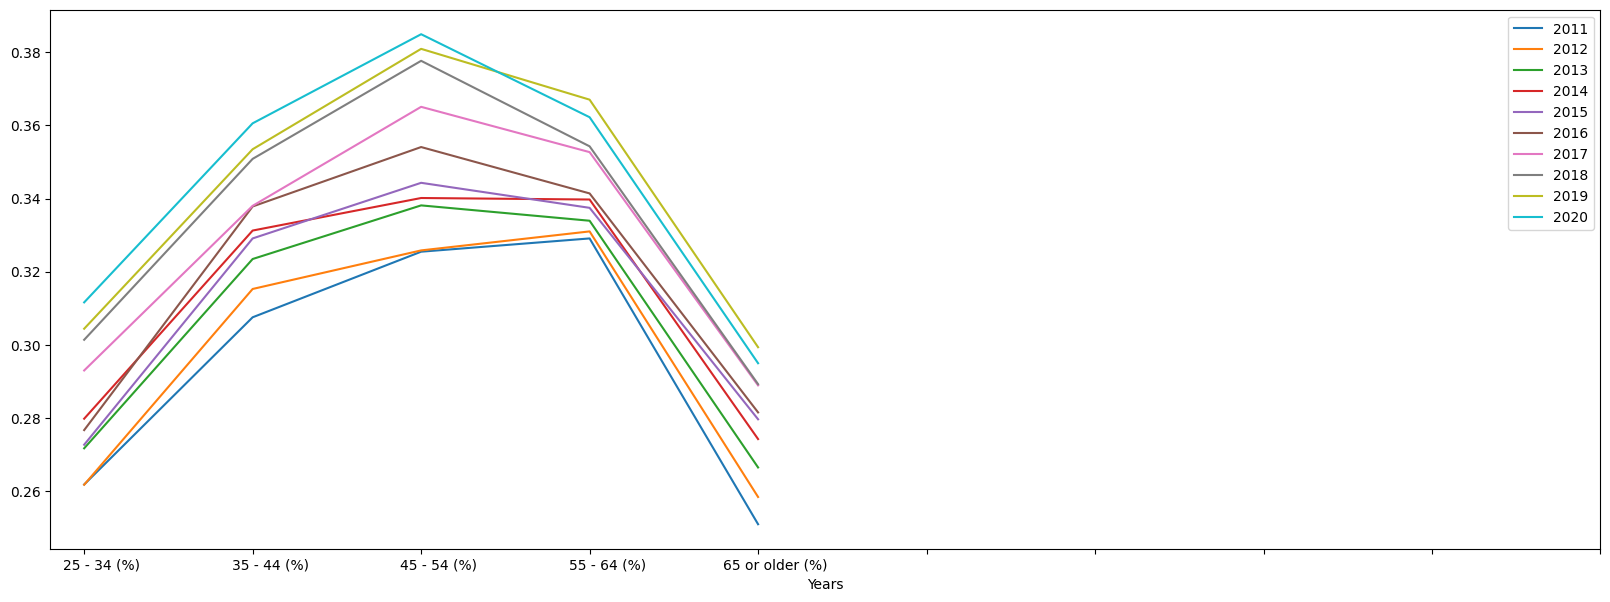

In [27]:
Obesidad_edad.iloc[0:10].plot(figsize=(20,7))
plt.xticks(rotation=90,ticks=np.arange(10),labels=Obesidad_edad.iloc[:].index)

Text(0.5, 0, 'Ratio Obesidad')

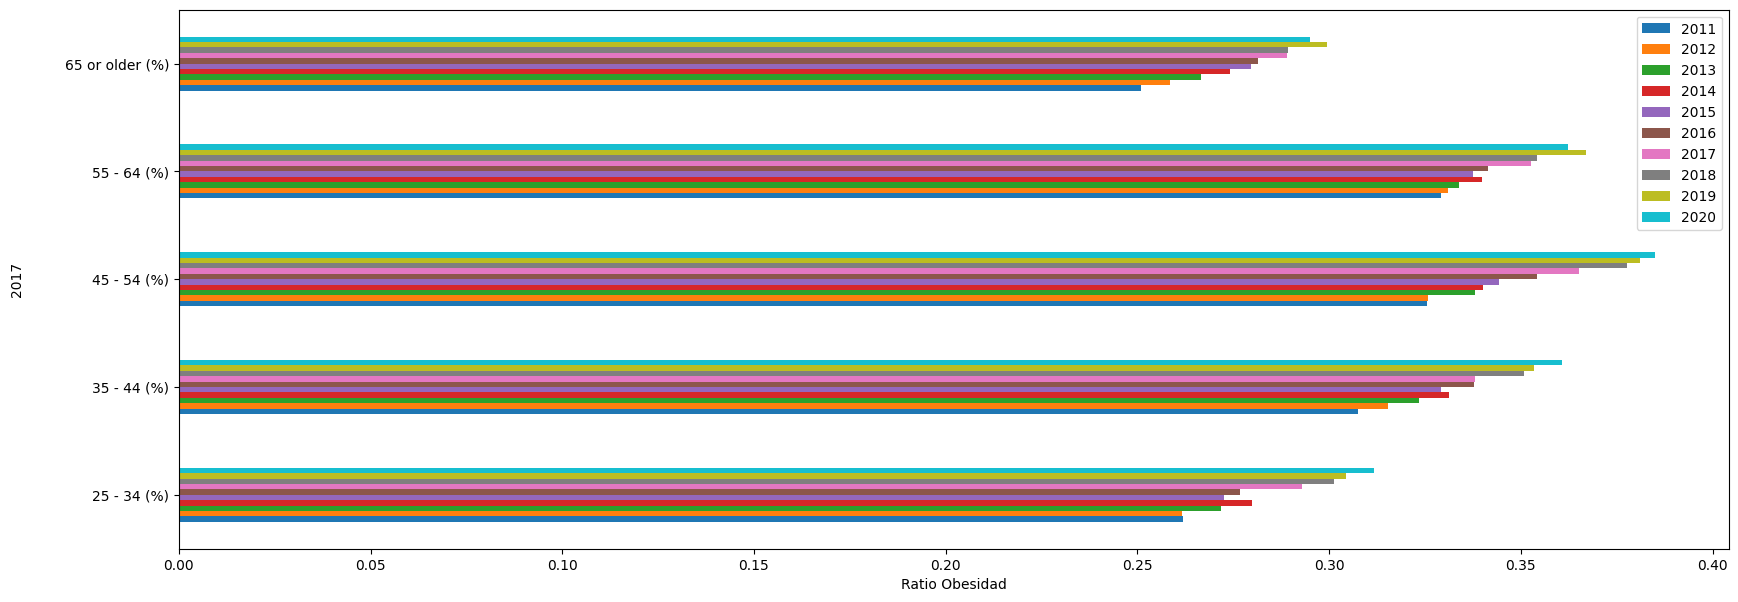

In [25]:
Obesidad_edad.plot(kind='barh',figsize=(20,7))
plt.ylabel("2017")
plt.xlabel("Ratio Obesidad")

In [14]:
Obesidad_G_anual=obesidad_ganancia_anual.set_index('Years')


In [1]:
# plt.figure(figsize=(15,15))
# sns.heatmap(Obesidad_G_anual.corr(),
#             vmin=-1,
#             vmax=1,
#             cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
#             square=True,
#             linewidths=.1,
#             annot=True);

ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of ticklabels (5).

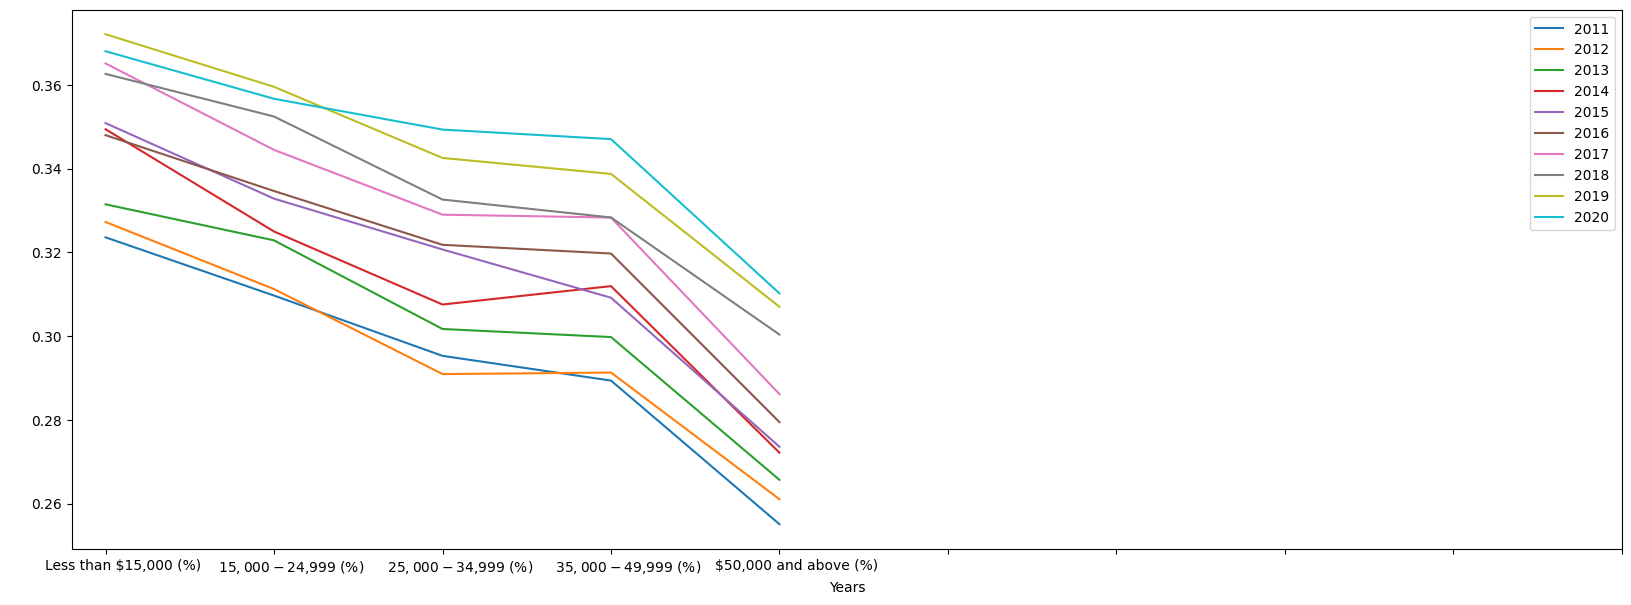

In [20]:
Obesidad_G_anual.iloc[:].plot(figsize=(20,7))
plt.xticks(rotation=90,ticks=np.arange(10),labels=Obesidad_G_anual.iloc[:].index)

Text(0.5, 0, 'Ratio Obesidad')

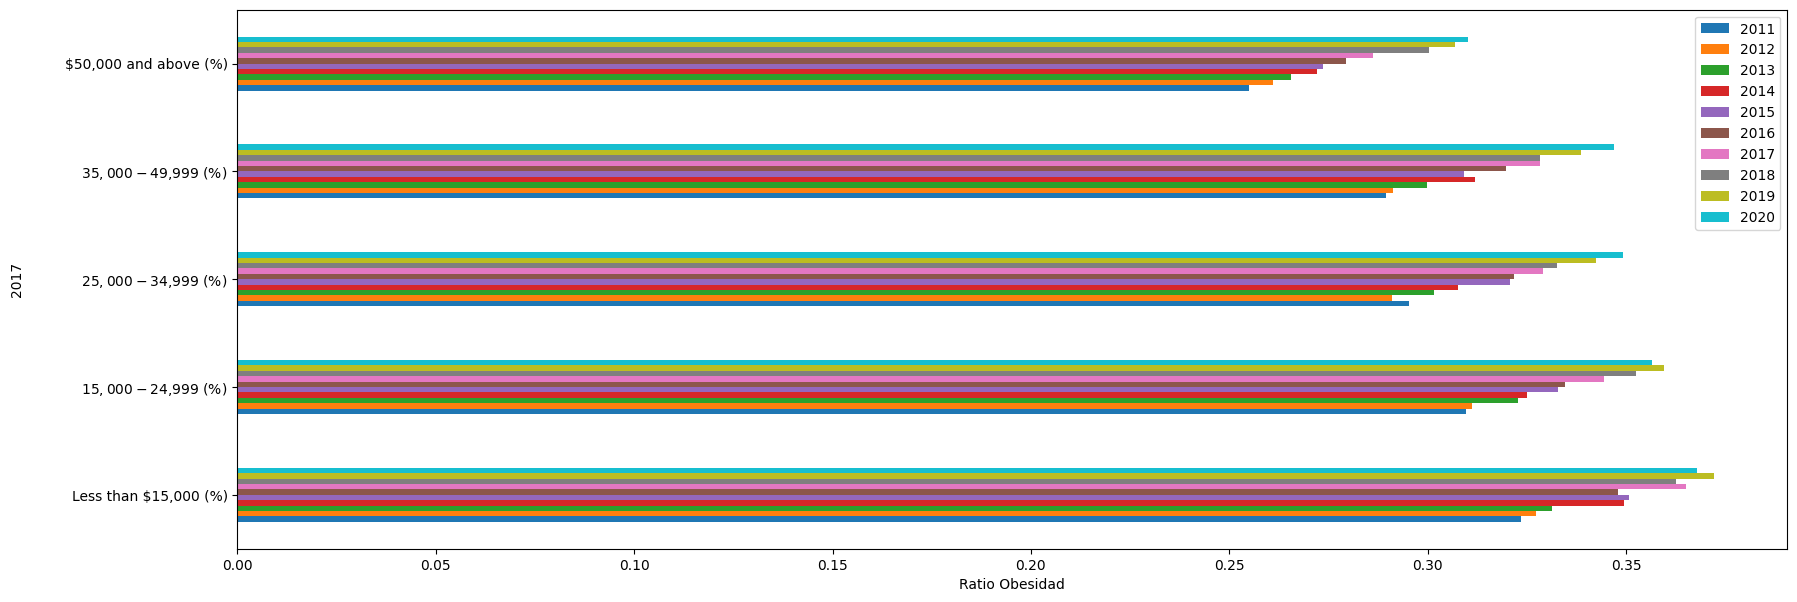

In [26]:
Obesidad_G_anual.plot(kind='barh',figsize=(20,7))

plt.ylabel("2017")
plt.xlabel("Ratio Obesidad")

### Visualizacion de datos nutritivos

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

<AxesSubplot:ylabel='Item'>

<Figure size 640x480 with 0 Axes>

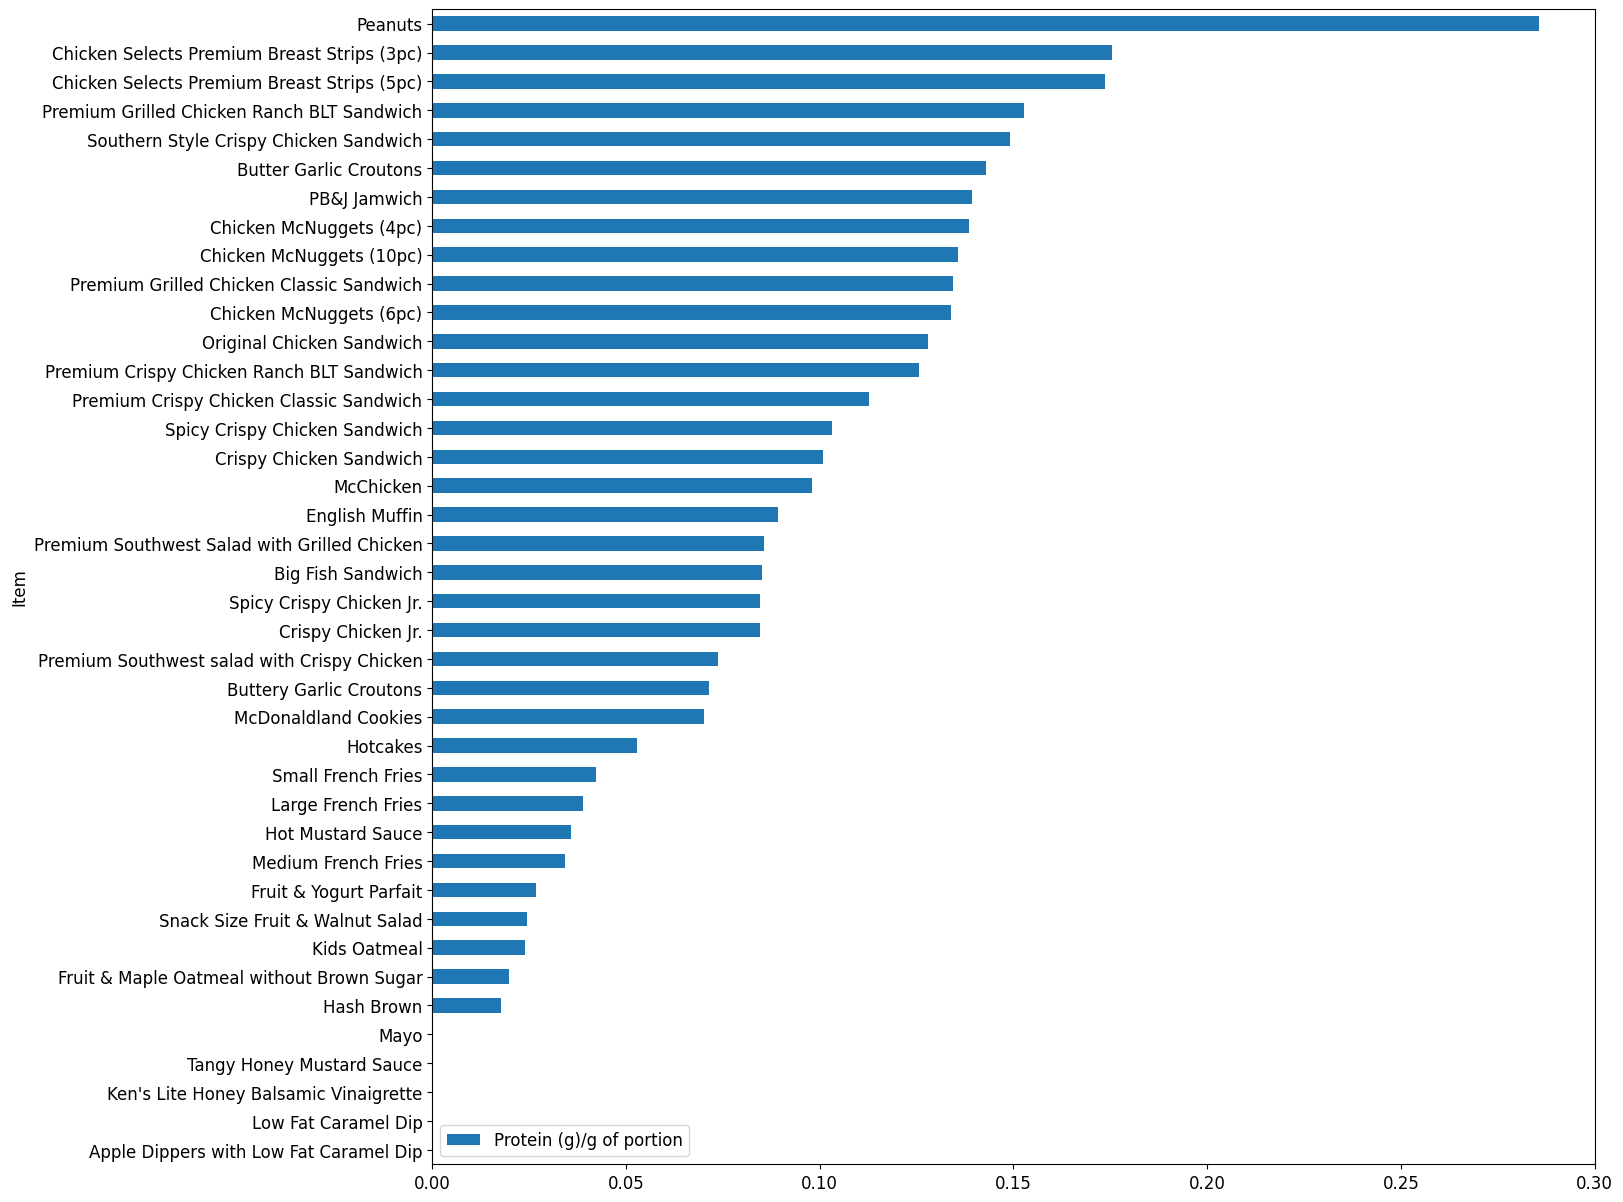

In [25]:

plt.figure()
plt.rcParams.update({'font.size': 12})
sodium_safe.sort_values(by='Protein (g)/g of portion').plot.barh(x='Item',y='Protein (g)/g of portion', figsize=(15,15), stacked=True);

In [38]:



fiber_good.sort_values(by='Protein (g)/g of portion').plot.barh(x='Item',y='Protein (g)/g of portion', figsize=(15,15), stacked=True)

KeyError: 'Protein (g)/g of portion'

In [ ]:
#let's add a column with a protein normalization per gram of the portion
fiber_good=fiber_good[fiber_good['Serving Size (g)']!=0]
fiber_good=fiber_good[fiber_good['Item']!=0]        
fiber_good['Protein (g)/g of portion']=fiber_good['Protein (g)']/fiber_good['Serving Size (g)']


fiber_good.sort_values(by='Protein (g)/g of portion').plot.barh(x='Item',y='Protein (g)/g of portion', figsize=(15,15), stacked=True)

## Preguntas y Respuestas

### Hipotessis 1:
-la obesidad va relacionada con la cantidad de restaurantes que hay en la zona:

no hay relacion directa entre los retaurantes de la zona y la obesidad
### Hipotesis 2: 
-la obesidad va en relacion a la cantidad de dinero agnada:

hay una relacion directa con el indice de obesidad y la cantidad de 
### Hipotesis 2.1:
-debido a los bajos precios de la comida rapida y su bajo valor nutricional se genera la obesidad